## Importing Required Libraries
This cell imports PyTorch, its neural network module, and torchinfo for model summary.

In [57]:
import torch
import torch.nn as nn

# Import torchinfo for model summary
from torchinfo import summary

# **Single Layer Neural Network**

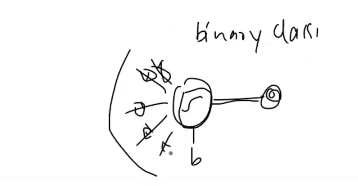

## Defining a Single Layer Neural Network
This cell defines a simple neural network with one linear layer followed by a sigmoid activation.

In [58]:
# Define a single layer neural network model
class Model(nn.Module):
    
    def __init__(self, num_features):
        # Call parent constructor
        super().__init__()
        
        # Linear layer: input features to 1 output
        self.linear = nn.Linear(num_features, 1)
        # Sigmoid activation for output
        self.sigmoid = nn.Sigmoid()
        
    
    def forward(self, features):
        # Pass input through linear layer
        out = self.linear(features)
        
        # Apply sigmoid activation
        out = self.sigmoid(out)
        
        # Return output
        return out

## Creating Input Features and Model Instance
This cell creates random input features and instantiates the single layer model.

In [59]:
# Create random input features (10 samples, 5 features each)
features = torch.rand(10, 5)

# Instantiate the single layer model
model = Model(features.shape[1])

# Forward pass: get model output for features
model(features)

tensor([[0.6561],
        [0.6080],
        [0.6191],
        [0.5357],
        [0.5413],
        [0.6357],
        [0.6521],
        [0.4936],
        [0.5535],
        [0.5481]], grad_fn=<SigmoidBackward0>)

## Viewing Model Weights
This cell displays the weights of the linear layer.

In [60]:
# View weights of the linear layer
model.linear.weight

Parameter containing:
tensor([[ 0.2822,  0.3193, -0.2541,  0.2047, -0.0826]], requires_grad=True)

## Viewing Model Bias
This cell displays the bias of the linear layer.

In [61]:
# View bias of the linear layer
model.linear.bias

Parameter containing:
tensor([0.1003], requires_grad=True)

## Model Summary
This cell prints a summary of the single layer model.

In [62]:
# Print summary of the single layer model
summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# **Multi Layer Neural Network**

- Input Layer with 5 inputs
    - Weights = 5 x 3
- 1 Hidden layer with 3 neurons -> Activation Function => ReLu
    - Weights = 3 x 1
    - Bias = 3
- 1 Output Layer with 1 neuron -> Activation Function => Sigmoid
    - Bias = 1

- Total Weights = (5 x 3) + (3 x 1)
                = 15 + 3
                = 18

- Total Bias = 3 + 1
             = 4

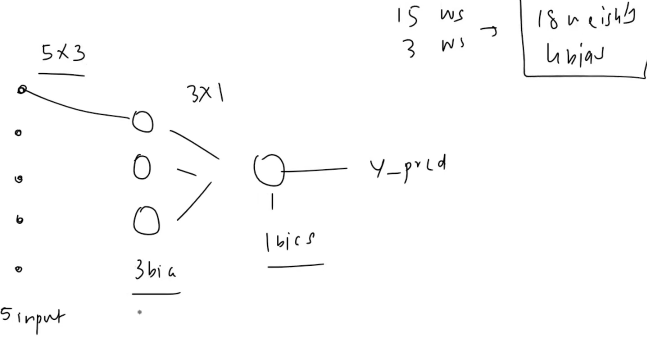

## Defining a Multi Layer Neural Network
This cell defines a neural network with one hidden layer using nn.Sequential.

In [63]:
# create model class
# While creating our class,
# we must inherit it from the nn.Module class in order to use its functionalities
class Model(nn.Module):

  def __init__(self, num_features):
      # Invoking Parent Class Constructor -> nn.Module Class
      super().__init__()

      '''
      # Alternative: manual layer definition
      self.linear1 = nn.Linear(num_features, 3)
      self.relu = nn.ReLU()
      self.linear2 = nn.Linear(3, 1)
      self.sigmoid = nn.Sigmoid()
      '''

      # Use nn.Sequential for compact definition
      self.network = nn.Sequential(
          nn.Linear(num_features, 3),  # First linear layer
          nn.ReLU(),                   # Activation
          nn.Linear(3, 1),             # Second linear layer
          nn.Sigmoid()                 # Output activation
      )

  def forward(self, features):
      '''
      # Alternative: manual forward pass
      out = self.linear1(features)
      out = self.relu(out)
      out = self.linear2(out)
      out = self.sigmoid(out)
      '''
      
      # Forward pass through sequential network
      out = self.network(features)

      return out

## Creating Input Features and Multi Layer Model Instance
This cell creates random input features and instantiates the multi layer model.

In [64]:
# Create random input features (10 samples, 5 features each)
features = torch.rand(10,5)

# Instantiate the multi-layer model
model = Model(features.shape[1])

# Forward pass: get model output for features
# model.forward(features)
model(features)

tensor([[0.5889],
        [0.5859],
        [0.5866],
        [0.5483],
        [0.5800],
        [0.5495],
        [0.5880],
        [0.5897],
        [0.5925],
        [0.5789]], grad_fn=<SigmoidBackward0>)

## Viewing First Layer Weights
This cell displays the weights of the first linear layer in the multi layer model.

In [65]:
# Show weights of the first linear layer in the multi-layer model

# model.linear1.weight  # If using manual definition

model.network[0].weight  # First layer in nn.Sequential

Parameter containing:
tensor([[ 0.4441, -0.2528,  0.2634, -0.1171, -0.2983],
        [ 0.1114,  0.0236, -0.3008, -0.3204,  0.0914],
        [ 0.3998,  0.1094,  0.2528,  0.0489, -0.1786]], requires_grad=True)

## Viewing Second Layer Weights
This cell displays the weights of the second linear layer in the multi layer model.

In [66]:
# Show weights of the second linear layer in the multi-layer model
model.network[2].weight  # Second layer in nn.Sequential

Parameter containing:
tensor([[-0.3820,  0.3964, -0.0446]], requires_grad=True)

## Viewing First Layer Bias
This cell displays the bias of the first linear layer in the multi layer model.

In [67]:
# Show bias of the first linear layer in the multi-layer model
model.network[0].bias

Parameter containing:
tensor([ 0.3910, -0.3342,  0.3250], requires_grad=True)

## Viewing Second Layer Bias
This cell displays the bias of the second linear layer in the multi layer model.

In [68]:
# Show bias of the second linear layer in the multi-layer model
model.network[2].bias

Parameter containing:
tensor([0.5235], requires_grad=True)

## Multi Layer Model Summary
This cell prints a summary of the multi layer model.

In [69]:
# Print summary of the multi-layer model
summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

---